<a href="https://colab.research.google.com/github/thatothapo/computationalphysics/blob/main/intro_to_MC_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Monte Carlo Methods

We will consider several basic Monte Carlo methods here, these are simply procedures that require random numbers. (Will need to figure out how the data stuff will work)

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

## Generating Random Data

We can generate 60 random readings from a given probability distribution, as shown below.

In [6]:
f = open("RandomData.txt", 'w')

header = f.write('Random numbers drawn from Guassian with mu = 40.0 and sigma = 2.0\n\n')

N=60
mu = 40.0
sigma = 2.0

newdata = random.normal(mu, sigma, N)

i = 1
for item in newdata:
    f.write(str(i) + '   %s\n' % item)
    i=i+1

# print(newdata)

In [7]:
xbar = np.mean(newdata)
sigma2 = np.sqrt(np.var(newdata))

print(xbar, sigma2)

40.08117144838755 1.4810162952325492


In [8]:
def gaussian1(xplot, xbar, sigma2):
    return (1.0/(sigma2*np.sqrt(2*np.pi)))*np.exp((-(xplot-xbar)**2)/(2*sigma2**2))

def gaussian2(xplot, mu, sigma):
    return (1.0/(sigma*np.sqrt(2*np.pi)))*np.exp((-(xplot-mu)**2)/(2*sigma**2))

In [9]:
xplot = np.linspace(30, 50, 1000)
yplot1 = gaussian1(xplot, xbar, sigma2)
yplot2 = gaussian2(xplot, mu, sigma)

binwidth = 0.8
bins = np.arange(np.floor(min(newdata)), np.floor(max(newdata))+1, binwidth)

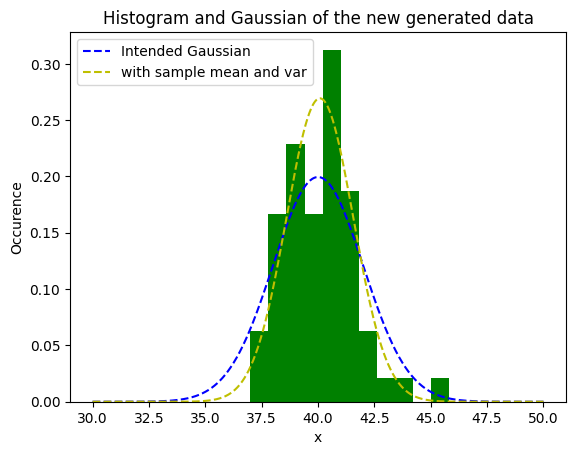

In [10]:
plt.plot(xplot, yplot2, 'b--', label='Intended Gaussian')
plt.plot(xplot, yplot1, 'y--', label='with sample mean and var')
plt.hist(newdata, bins, density=True, facecolor='green', ec='black')
plt.title('Histogram and Gaussian of the new generated data')
plt.xlabel('x')
plt.ylabel('Occurence')
plt.legend()
plt.savefig('HistGauss2.png', dpi = 200)
plt.draw()
plt.show()

f.close()

We can also use Monte Carlo methods to determine the value of $\pi$. We do this by using the ratio of random points within a square of length two and a unit circle inside the square, as shown below.

In [11]:
N=5000000 # number of random points in the square

# random x and y coordinates for points in square of length 2
x=random.uniform(-1,1,N)
y=random.uniform(-1,1,N)

In [12]:
in_circle = 0 # number of random points in unit circle (initial)

# for loop to see how many random points in the square are in the unit circle
for i in range(N):
    if x[i]**2 + y[i]**2 < 1 or x[i]**2 + y[i]**2 == 1:
        in_circle += 1

# ratio relating no. of random points in the circle to those in the square to get Pi
C = in_circle
Pi = 4*(C/N)

In [14]:
sigma1 = np.std(x)
sigma2 = np.std(y)
print(sigma1, sigma2)

u = np.sqrt((sigma1**2)+(sigma2**2)) # Do this properly using both the Bootstrap and Jacknife methods
print(u)

print(Pi)

0.5774221633779321 0.5774364872575292
0.8166083832390933
3.1417808
